<a href="https://colab.research.google.com/github/pseeej/MachineLearning_DCLAB/blob/master/DL%20for%20Everyone/18.%20RNN1%20Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters  # 로이터 뉴스 데이터셋 불러오기
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
# 데이터 확인하기
category = np.max(Y_train)+1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')

# 딥러닝은 단어를 그대로 사용하지 않고 숫자로 변환한 다음 학습 가능. 데이터 안에서 해당 단어가 몇 번 나타나는지 세어 빈도에 따라 번호 붙임. 주어진 숫자는 빈도 높은 순위라고 생각하면 됨.
# 빈도가 1에서 1000(위 cell에서의 num_words) 사이인 단어만 선택해서 불러옴. 모든 단어 사용하기엔 비효율적이므로.
print(X_train[0]) 

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
# 데이터 전처리
# 각 기사의 단어 수가 다르므로 이를 동일하게 맞춰주기 위해 사용. maxlen으로 단어 개수 맞춤. 100에서 모자랄 때는 다 0으로 채움.
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

# one-hot-encoding 사용하여 데이터 전처리 과정 수행
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [6]:
# 모델의 설정
model = Sequential()

# 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환.
# Embedding(불러온 단어의 총 개수, 기사당 단어 수)
model.add(Embedding(1000, 100))

# RNN에서 기억 값에 대한 가중치 제어하는 LSTM.
# LSTM(기사당 단어 수, 기타 옵션) 여기서는 기타 옵션으로 활성화함수 tanh 지정
model.add(LSTM(100, activation='tanh'))

model.add(Dense(46, activation='softmax'))

In [7]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 38s 242ms/step - loss: 2.9665 - accuracy: 0.3179 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 20s 218ms/step - loss: 2.0570 - accuracy: 0.4787 - val_loss: 1.9395 - val_accuracy: 0.5076
Epoch 3/20
90/90 [==============================] - 20s 220ms/step - loss: 1.9519 - accuracy: 0.4981 - val_loss: 1.7940 - val_accuracy: 0.5401
Epoch 4/20
90/90 [==============================] - 20s 218ms/step - loss: 1.7491 - accuracy: 0.5405 - val_loss: 1.8132 - val_accuracy: 0.5543
Epoch 5/20
90/90 [==============================] - 20s 218ms/step - loss: 1.7558 - accuracy: 0.5470 - val_loss: 1.6890 - val_accuracy: 0.5668
Epoch 6/20
90/90 [==============================] - 19s 215ms/step - loss: 1.6683 - accuracy: 0.5757 - val_loss: 1.6413 - val_accuracy: 0.6042
Epoch 7/20
90/90 [==============================] - 19s 217ms/step - loss: 1.6052 - accuracy: 0.5994 - val_loss: 1.6004 - val_accuracy: 0.6042

In [9]:
# 테스트 정확도 출력
print("\n Test Accuracy : %.4f" %(model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 1s 20ms/step - loss: 1.2275 - accuracy: 0.7057

 Test Accuracy : 0.7057


In [10]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

In [11]:
# 학습셋의 오차
y_loss = history.history['loss']

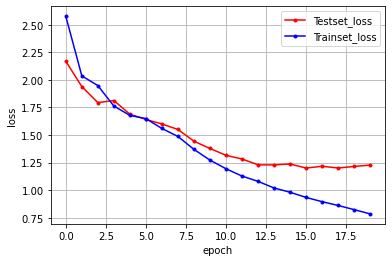

In [14]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()